In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../measurement_data/rf_measurements.csv")

### Return Loss ($RL$)

Return Loss is a measure of the power reflected back toward the source due to an impedance mismatch in a transmission line or optical fiber. It is the ratio of incident power to reflected power, typically expressed in decibels (dB). In RF engineering, it is derived from the reflection coefficient, $S_{11}$.

\begin{equation}
S_{11} = \frac{incident}{reflected}
\end{equation}

## 1. Magnitude of $S_{11}$
Given the real and imaginary components from the dataset ($S_{11} = \text{Re} + j\text{Im}$), the magnitude $|S_{11}|$ is calculated as:

\begin{equation}
|S_{11}| = \sqrt{S_{11,real}^2 + S_{11,imag}^2}
\end{equation}

## 2. Return Loss Calculation (dB)
Return Loss is defined as the negative magnitude of the reflection coefficient in decibels:

\begin{equation}
RL(\text{dB}) = -20 \log_{10}(|S_{11}|)
\end{equation}

Note: In practice, while $S_{11}$ is mathematically negative, Return Loss is often expressed as a positive scalar representing the magnitude of that "loss."} *

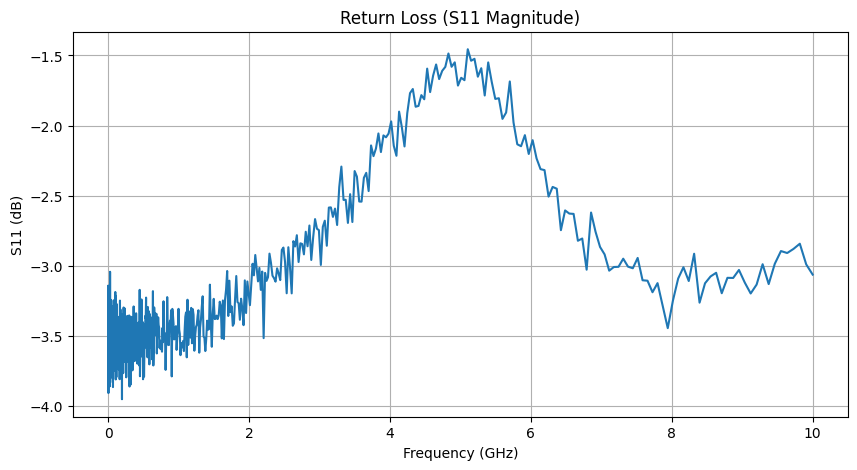

In [20]:
### Lets plot the S11 magnitude in dB vs frequency in GHz

# 1. Extract frequency and calculate magnitude
frequencies = df["frequency_Hz"].values
S11_mag = np.sqrt(df["S11_real"]**2 + df["S11_imag"]**2)

# 2. Convert to decibels (dB)
S11_mag_db = 20 * np.log10(S11_mag)

# 3. Plotting (divide by 1e9 to convert Hz to GHz for the x-axis)
plt.figure(figsize=(10, 5))
plt.plot(frequencies / 1e9, S11_mag_db) 

plt.title("Return Loss (S11 Magnitude)")
plt.ylabel("S11 (dB)")
plt.xlabel("Frequency (GHz)")
plt.grid(True)
plt.show()

### Forward Transmission ($S_{21}$)
The Forward Transmission Coefficient ($S_{21}$) represents the ratio of the signal coming out of Port 2 to the signal injected into Port 1. In passive systems (like cables or filters), it measures Insertion Loss, while in active systems (like amplifiers), it measures Gain.1. Magnitude of $S_{21}$Using the real and imaginary components from the dataset ($S_{21} = \text{Re} + j\text{Im}$), the linear magnitude $|S_{21}|$ is calculated as:$$|S_{21}| = \sqrt{S_{21,real}^2 + S_{21,imag}^2}$$2. Transmission / Gain Calculation (dB)To analyze the transmission on a logarithmic scale, we convert the linear magnitude to decibels:$$S_{21}(\text{dB}) = 20 \log_{10}(|S_{21}|)$$3. Physical Significance0 dB: Indicates perfect transmission where 100% of the power reaches the output.Negative dB (e.g., -3 dB): Indicates Insertion Loss. A value of -3 dB means approximately 50% of the power was lost or absorbed by the device.Positive dB (e.g., +15 dB): Indicates Gain, meaning the device is an amplifier increasing the signal strength.

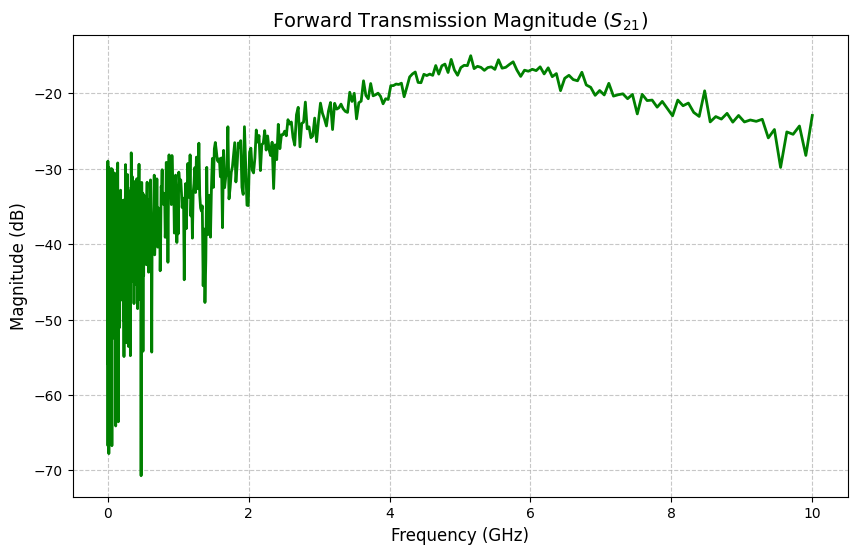

In [21]:
s21_real = df["S21_real"].values
s21_imag = df["S21_imag"].values

# 3. Calculate linear magnitude
# |S21| = sqrt(Re^2 + Im^2)
s21_mag = np.sqrt(s21_real**2 + s21_imag**2)

# 4. Convert to decibels (dB)
# S21(dB) = 20 * log10(|S21|)
s21_db = 20 * np.log10(s21_mag)

# 5. Create the plot
plt.figure(figsize=(10, 6))

# Converting x-axis to GHz for better readability (Hz / 1e9)
plt.plot(frequencies / 1e9, s21_db, label="$S_{21}$ (Transmission)", color="green", linewidth=2)

# Add titles and labels
plt.title("Forward Transmission Magnitude ($S_{21}$)", fontsize=14)
plt.xlabel("Frequency (GHz)", fontsize=12)
plt.ylabel("Magnitude (dB)", fontsize=12)
plt.grid(True, which='both', linestyle='--', alpha=0.7)